<a href="https://colab.research.google.com/github/Degananda264/Natural-Language-Processing-/blob/master/Text_Representation_Embedding_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Corpus Of Data**

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


**Simple Text Preprocessing**

In [2]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

**Word2Vec**

In [3]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model


In [4]:
w2v_model.wv.vocab

{'bacon': <gensim.models.keyedvectors.Vocab at 0x7f557cd70898>,
 'beans': <gensim.models.keyedvectors.Vocab at 0x7f557cd70940>,
 'beautiful': <gensim.models.keyedvectors.Vocab at 0x7f557cd70588>,
 'blue': <gensim.models.keyedvectors.Vocab at 0x7f55a5f23828>,
 'breakfast': <gensim.models.keyedvectors.Vocab at 0x7f557cd707f0>,
 'brown': <gensim.models.keyedvectors.Vocab at 0x7f557cd706a0>,
 'dog': <gensim.models.keyedvectors.Vocab at 0x7f557cd70780>,
 'eggs': <gensim.models.keyedvectors.Vocab at 0x7f557cd708d0>,
 'fox': <gensim.models.keyedvectors.Vocab at 0x7f557cd706d8>,
 'green': <gensim.models.keyedvectors.Vocab at 0x7f557cd70978>,
 'ham': <gensim.models.keyedvectors.Vocab at 0x7f557cd70860>,
 'jumps': <gensim.models.keyedvectors.Vocab at 0x7f557cd70710>,
 'kings': <gensim.models.keyedvectors.Vocab at 0x7f557cd707b8>,
 'lazy': <gensim.models.keyedvectors.Vocab at 0x7f557cd70748>,
 'love': <gensim.models.keyedvectors.Vocab at 0x7f557cd70630>,
 'quick': <gensim.models.keyedvectors.Voca

In [5]:
vectors=w2v_model.wv['brown']

In [6]:
vectors

array([ 0.4117856 , -0.58267826, -1.0341804 , -0.6143184 , -0.02773293,
       -0.7234793 , -0.6358078 ,  0.53000075,  0.4196786 , -0.43886828,
        0.03161012,  0.3703448 , -1.2331456 , -0.1161972 , -1.2750474 ],
      dtype=float32)

In [7]:
len(vectors)

15

In [8]:

# Most similar words
similar = w2v_model.wv.most_similar('sky')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
similar

[('today', 0.9731181263923645),
 ('beautiful', 0.9600929617881775),
 ('blue', 0.9449462294578552),
 ('love', 0.7036038041114807),
 ('fox', 0.4314805567264557),
 ('quick', 0.4311116933822632),
 ('dog', 0.4295259118080139),
 ('green', 0.4225662350654602),
 ('brown', 0.41626831889152527),
 ('lazy', 0.37572652101516724)]

**Embeddings Visualisation**

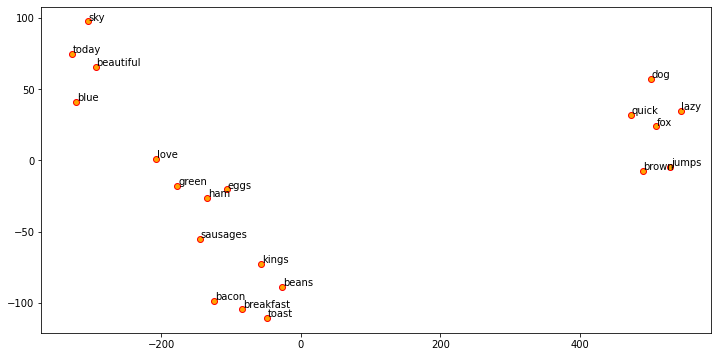

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [11]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,0.315932,-0.957215,0.148491,-0.288497,-0.564258,-1.366515,-0.052809,0.407432,0.334272,0.884648,0.865584,0.911991,-0.749781,-0.557008,0.175038
blue,0.024920,-0.818665,-0.037794,-0.283566,-0.463858,-0.891535,-0.206794,0.418342,0.242659,0.344873,0.551116,0.499805,-0.716443,-0.348196,-0.180886
beautiful,-0.007831,-0.797224,-0.213083,-0.470726,-0.708865,-1.166911,-0.070576,0.392934,0.373388,0.831622,0.643168,0.781079,-0.576535,-0.764315,0.388659
quick,0.025051,-0.502651,-1.093273,-0.557866,-0.107853,-0.889412,-0.454977,0.748913,0.484575,-0.408477,0.261024,0.307816,-1.112180,0.166232,-1.245221
brown,0.411786,-0.582678,-1.034180,-0.614318,-0.027733,-0.723479,-0.635808,0.530001,0.419679,-0.438868,0.031610,0.370345,-1.233146,-0.116197,-1.275047
fox,0.203801,-0.531729,-1.095837,-0.475462,-0.052501,-0.840992,-0.574282,0.598836,0.475215,-0.599594,0.317252,0.274127,-1.339782,-0.029039,-1.117339
lazy,0.406161,-0.704614,-1.318909,-0.715955,-0.167764,-0.760399,-0.632101,0.519936,0.334880,-0.603261,0.245915,-0.001420,-1.006274,-0.087461,-1.097405
dog,0.106258,-0.533575,-0.999236,-0.468492,-0.098402,-0.796200,-0.458354,0.705191,0.401919,-0.532400,0.339057,0.393780,-1.159950,0.084845,-1.304194
love,0.117165,0.133263,-0.181254,-0.035169,-0.091759,-0.806384,-0.355329,0.422747,0.032224,0.574905,0.493617,0.401486,0.108045,-0.308795,0.588808
sausages,0.343154,0.951999,-0.484912,-0.327812,0.507930,-1.180161,-0.827465,0.599829,0.016823,0.266663,0.399751,0.575765,0.495543,-0.455016,0.555791


**Looking at term semantic similarity**

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,kings,breakfast,toast,beans,green,today
sky,1.000000,0.944946,0.960093,0.431112,0.416268,0.431481,0.375727,0.429526,0.703604,0.316939,0.302064,0.276957,0.306861,0.321970,0.214005,0.222791,0.198360,0.203322,0.422566,0.973118
blue,0.944946,1.000000,0.916266,0.651156,0.628376,0.650293,0.598742,0.652737,0.556827,0.207696,0.206316,0.161143,0.215809,0.556543,0.134424,0.116787,0.113943,0.115231,0.307649,0.929935
beautiful,0.960093,0.916266,1.000000,0.417676,0.394448,0.412579,0.381537,0.400768,0.740820,0.359930,0.347989,0.331948,0.320708,0.304295,0.220033,0.237785,0.214186,0.233794,0.447331,0.988877
quick,0.431112,0.651156,0.417676,1.000000,0.967978,0.983403,0.954792,0.993786,0.126359,0.153966,0.141062,0.166777,0.163048,0.978795,0.188955,0.193733,0.185464,0.182689,0.119906,0.416014
brown,0.416268,0.628376,0.394448,0.967978,1.000000,0.981508,0.968868,0.974747,0.075238,0.135547,0.109051,0.167953,0.125936,0.982408,0.213657,0.198637,0.212504,0.207117,0.101143,0.396040
fox,0.431481,0.650293,0.412579,0.983403,0.981508,1.000000,0.969542,0.989042,0.115081,0.149049,0.137209,0.154452,0.144804,0.986225,0.181061,0.181069,0.181912,0.183694,0.112409,0.412989
lazy,0.375727,0.598742,0.381537,0.954792,0.968868,0.969542,1.000000,0.954350,0.088555,0.141109,0.118746,0.199519,0.107473,0.969195,0.173482,0.180663,0.188622,0.189394,0.115086,0.372423
dog,0.429526,0.652737,0.400768,0.993786,0.974747,0.989042,0.954350,1.000000,0.094836,0.125026,0.125947,0.132336,0.145466,0.983891,0.176597,0.167188,0.170513,0.163546,0.097853,0.404485
love,0.703604,0.556827,0.740820,0.126359,0.075238,0.115081,0.088555,0.094836,1.000000,0.816443,0.816766,0.751722,0.803404,0.052195,0.678496,0.701975,0.678765,0.694646,0.855971,0.721207
sausages,0.316939,0.207696,0.359930,0.153966,0.135547,0.149049,0.141109,0.125026,0.816443,1.000000,0.960558,0.933719,0.942111,0.156236,0.912894,0.942687,0.937721,0.947605,0.930115,0.316177


In [13]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky              [today, beautiful, blue]
blue              [sky, today, beautiful]
beautiful              [today, sky, blue]
quick                   [dog, fox, jumps]
brown                   [jumps, fox, dog]
fox                   [dog, jumps, quick]
lazy                  [fox, jumps, brown]
dog                   [quick, fox, jumps]
love               [green, ham, sausages]
sausages          [ham, beans, breakfast]
ham               [eggs, sausages, beans]
bacon        [breakfast, beans, sausages]
eggs               [ham, kings, sausages]
jumps                   [fox, dog, brown]
kings           [toast, beans, breakfast]
breakfast           [beans, toast, kings]
toast           [kings, beans, breakfast]
beans           [toast, breakfast, kings]
green               [sausages, eggs, ham]
today              [beautiful, sky, blue]
dtype: object

**GLoVe Model**

In [14]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [15]:
!python -m spacy download en_vectors_web_lg

     |████████████████████████████████| 661.8MB 1.2MB/s 
  Created wheel for en-vectors-web-lg: filename=en_vectors_web_lg-2.1.0-cp36-none-any.whl size=663461747 sha256=531f42da17ec09bbe1b8e17afb2b61273b50fb732ed7e7bc69377302aa982bd5
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcaxsj6o/wheels/ce/3e/83/59647d0b4584003cce18fb68ecda2866e7c7b2722c3ecaddaf
Successfully built en-vectors-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [19]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=bf4411f3e7e367d7d9e8729c3ae9e8c57a906909c1e2f8e689f1cff997ec8b94
  Stored in directory: /tmp/pip-ephem-wheel-cache-cnaz5p1q/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [21]:
import spacy
import en_vectors_web_lg
nlp = en_vectors_web_lg.load()
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [23]:
tokenized_corpus

[['sky', 'blue', 'beautiful'],
 ['love', 'blue', 'beautiful', 'sky'],
 ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'],
 ['kings', 'breakfast', 'sausages', 'ham', 'bacon', 'eggs', 'toast', 'beans'],
 ['love', 'green', 'eggs', 'ham', 'sausages', 'bacon'],
 ['brown', 'fox', 'quick', 'blue', 'dog', 'lazy'],
 ['sky', 'blue', 'sky', 'beautiful', 'today'],
 ['dog', 'lazy', 'brown', 'fox', 'quick']]

In [24]:
unique_words=list(set([word for sublist in tokenized_corpus for word in sublist]))

In [26]:
print(unique_words)

['beautiful', 'fox', 'eggs', 'brown', 'sausages', 'ham', 'dog', 'today', 'quick', 'breakfast', 'beans', 'kings', 'lazy', 'toast', 'green', 'bacon', 'sky', 'jumps', 'blue', 'love']


In [28]:
word_glove_vectors=np.array([nlp(word).vector for word in unique_words])

In [29]:
vec_df=pd.DataFrame(word_glove_vectors,index=unique_words)

In [30]:
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
beautiful,0.171200,0.534390,-0.348540,-0.097234,0.101800,-0.170860,0.295650,-0.041816,-0.516550,2.117200,0.179450,0.264130,-0.231180,-0.328040,-0.219140,-0.043589,-0.492380,1.642500,0.243910,-0.196320,-0.257400,0.071950,-0.027151,-0.065426,-0.224650,0.159030,0.545230,-0.178430,-0.233200,0.475470,-0.073868,0.261460,-0.195230,-0.084660,0.128970,-0.460530,0.164740,-0.450340,-0.340450,-0.214240,...,0.527940,0.122210,0.367880,0.142500,0.039286,-0.418430,0.020668,-0.153280,-0.852450,0.400710,-1.663700,-0.472610,-0.488350,-0.506310,-0.205750,0.100800,0.075323,-0.022721,0.207690,-0.112650,0.589970,-0.206480,-0.314750,-0.220790,-0.126200,-0.028778,-0.176830,0.180990,0.232540,-0.199140,-0.285540,0.104670,0.126310,0.120040,0.254380,0.247400,0.207670,0.172580,0.063875,0.350990
fox,-0.348680,-0.077720,0.177750,-0.094953,-0.452890,0.237790,0.209440,0.037886,0.035064,0.899010,-0.517950,-0.547580,-0.673110,-0.131650,-0.585420,0.312030,-0.094121,0.140050,0.028915,-0.242290,-0.091525,0.133210,0.114760,-0.545550,-0.046149,-0.022279,-0.994870,0.240050,-0.113700,-0.117760,-0.478400,0.278980,0.659960,-0.082358,0.075643,-0.308380,0.134520,-0.122870,-0.243410,-0.010298,...,0.520700,0.152850,0.196420,-0.176430,0.433690,-0.492050,0.044667,0.195000,-0.431390,0.167560,-0.896450,0.551010,0.004203,0.328360,0.343580,0.185590,-0.146440,0.156990,-0.507790,0.071018,0.156870,0.230150,0.087828,0.270050,0.266410,0.291140,-0.132860,-0.254160,-0.095441,-0.174040,-0.283050,0.270240,-0.654800,0.105300,-0.068738,-0.534750,0.061783,0.123610,-0.553700,-0.544790
eggs,-0.417810,-0.035192,-0.126150,-0.215930,-0.669740,0.513250,-0.797090,-0.068611,0.634660,1.256300,-0.809100,0.012227,-0.261690,0.260560,0.260520,-0.185840,-0.285730,1.359900,-0.115380,-0.019430,-0.033052,0.386340,-0.520640,-0.325880,-0.255210,-0.614430,-0.366000,0.133900,0.049880,-1.093600,-0.436250,-0.279800,0.525020,-0.450040,0.196330,0.611860,0.004073,-0.381950,0.357830,0.753130,...,-0.016694,0.168550,-0.135030,0.072960,-0.065344,0.768680,-0.194850,-0.313310,-0.552650,-0.488490,0.470120,-0.396550,0.688490,-0.017080,-1.037700,0.081078,-0.414330,0.188600,0.216510,0.603600,0.943960,-0.288970,-0.023022,-0.616510,-0.180130,0.405020,0.043301,-0.438280,-0.684250,0.209900,-0.232860,-0.139740,-0.681080,-0.370920,-0.545510,0.073728,0.111620,-0.324700,0.059721,0.159160
brown,-0.374120,-0.076264,0.109260,0.186620,0.029943,0.182700,-0.631980,0.133060,-0.128980,0.603430,-0.680410,-0.142220,-0.133570,-0.659430,0.052402,0.167450,0.639230,1.768000,0.346190,-0.624800,-0.128670,-0.197030,-0.374500,0.330640,0.046832,-0.653510,-0.561360,0.227370,0.229230,-0.415810,-0.167670,0.335430,0.097227,-0.467030,-0.026857,-0.067665,-0.192110,-0.133740,0.016268,-0.208270,...,0.117450,0.055016,0.236820,0.898190,-0.409690,0.075218,-0.110300,-0.409910,-0.957180,0.527490,-0.042655,0.266180,0.305260,-0.519010,-0.460440,-0.093834,0.130060,0.019268,0.010198,0.007583,0.295510,0.231560,-0.034880,-0.116940,-0.327330,0.204910,0.475000,0.513100,-0.145760,-0.185080,-0.015404,0.392890,-0.034826,-0.720300,-0.365320,0.740510,0.108390,-0.365760,-0.288190,0.114630
sausages,-0.174290,-0.064869,-0.046976,0.287420,-0.128150,0.647630,0.056315,-0.240440,-0.025094,0.502220,0.029936,0.871290,-0.270070,-0.854380,0.241580,-0.278750,0.479100,0.132680,0.284740,0.323430,-0.171420,0.324220,0.137840,-0.357310,0.288720,-0.357420,-0.602930,-0.186040,-0.271860,-0.829750,0.270550,0.225760,0.352370,-0.196700,1.051100,0.210840,0.115040,0.283120,0.700670,1.452400,...,0.145720,-0.327310,-0.594870,0.679110,0.213380,1.053200,-0.032428,0.105010,-0.622310,-0.151530,0.418720,-0.380260,0.401980,-0.007394,-0.399710,0.896790,-0.081613,-0.019213,0.360840,0.013679,0.437120,-0.148730,-0.078819,-0.435240,0.249950,0.6634

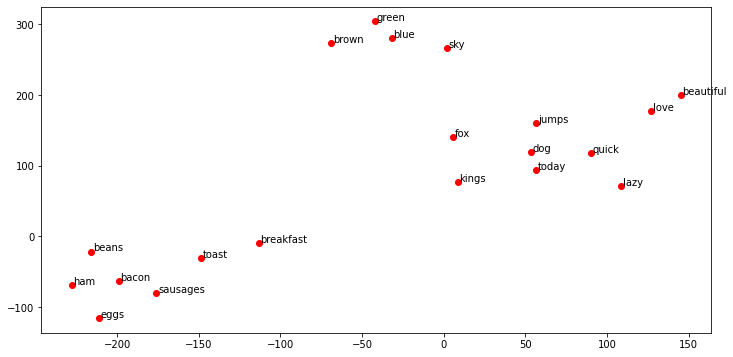

In [31]:
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

**Looking at term semantic similarity**

In [32]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,beautiful,fox,eggs,brown,sausages,ham,dog,today,quick,breakfast,beans,kings,lazy,toast,green,bacon,sky,jumps,blue,love
beautiful,1.000000,0.210050,0.214437,0.355700,0.114540,0.110936,0.280658,0.314184,0.289178,0.314472,0.165268,0.158615,0.294308,0.189482,0.392392,0.151157,0.428081,0.142554,0.461366,0.594738
fox,0.210050,1.000000,0.247314,0.406912,0.133348,0.209454,0.485855,0.150072,0.192686,0.165064,0.118537,0.226735,0.267240,0.163371,0.323800,0.210082,0.303459,0.250834,0.371178,0.255050
eggs,0.214437,0.247314,1.000000,0.466903,0.548310,0.489116,0.291202,0.183048,0.245487,0.431108,0.585053,0.118818,0.236769,0.495935,0.392072,0.620539,0.223585,0.150622,0.297546,0.254177
brown,0.355700,0.406912,0.466903,1.000000,0.289625,0.335111,0.341204,0.147418,0.217009,0.277158,0.453427,0.193487,0.256875,0.347578,0.646850,0.432891,0.408844,0.110400,0.683011,0.331943
sausages,0.114540,0.133348,0.548310,0.289625,1.000000,0.622770,0.247529,0.094879,0.162966,0.415231,0.546647,0.070071,0.168205,0.498062,0.233169,0.729162,0.061753,0.083306,0.097443,0.146917
ham,0.110936,0.209454,0.489116,0.335111,0.622770,1.000000,0.262579,0.104115,0.191665,0.371688,0.495773,0.127651,0.222571,0.500586,0.290761,0.738816,0.174496,0.046432,0.185452,0.218128
dog,0.280658,0.485855,0.291202,0.341204,0.247529,0.262579,1.000000,0.223730,0.299892,0.295957,0.230778,0.156674,0.301678,0.182994,0.272693,0.295123,0.219087,0.307961,0.314065,0.358715
today,0.314184,0.150072,0.183048,0.147418,0.094879,0.104115,0.223730,1.000000,0.370023,0.288788,0.147652,0.204743,0.286802,0.174257,0.246754,0.158949,0.256770,0.142099,0.180088,0.371650
quick,0.289178,0.192686,0.245487,0.217009,0.162966,0.191665,0.299892,0.370023,1.000000,0.358221,0.251534,0.127679,0.400060,0.292624,0.287504,0.265370,0.192515,0.301096,0.220331,0.292446
breakfast,0.314472,0.165064,0.431108,0.277158,0.415231,0.371688,0.295957,0.288788,0.358221,1.000000,0.378215,0.161841,0.319941,0.513436,0.288437,0.487737,0.205429,0.103865,0.197103,0.245735


In [33]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)


beautiful           [love, blue, sky]
fox                [dog, brown, blue]
eggs         [bacon, beans, sausages]
brown             [blue, green, eggs]
sausages           [bacon, ham, eggs]
ham          [bacon, sausages, toast]
dog                [fox, love, brown]
today        [love, quick, beautiful]
quick        [lazy, today, breakfast]
breakfast        [toast, bacon, eggs]
beans         [bacon, eggs, sausages]
kings                [love, sky, fox]
lazy         [quick, love, breakfast]
toast         [bacon, breakfast, ham]
green              [blue, brown, sky]
bacon          [ham, sausages, toast]
sky          [blue, green, beautiful]
jumps               [dog, quick, sky]
blue              [green, brown, sky]
love         [beautiful, today, blue]
dtype: object

**FastText Model**

In [34]:
from gensim.models.fasttext import FastText
# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

In [35]:
vectors=ft_model.wv['brown']

In [36]:
vectors

array([-0.03791445,  1.5080076 ,  0.99823177,  0.16381487, -1.16185   ,
       -0.37105557, -0.07042266,  0.4354506 , -0.46987548,  0.0701965 ,
        0.64609677,  0.00364985, -0.55289066,  0.40629813,  0.46743408],
      dtype=float32)

In [39]:
# Most similar words
similar = w2v_model.wv.most_similar('brown')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [40]:
similar

[('jumps', 0.9824082851409912),
 ('fox', 0.9815082550048828),
 ('dog', 0.9747474193572998),
 ('lazy', 0.968867838382721),
 ('quick', 0.9679775238037109),
 ('blue', 0.6283762454986572),
 ('sky', 0.41626831889152527),
 ('today', 0.3960404396057129),
 ('beautiful', 0.3944479823112488),
 ('kings', 0.21365663409233093)]

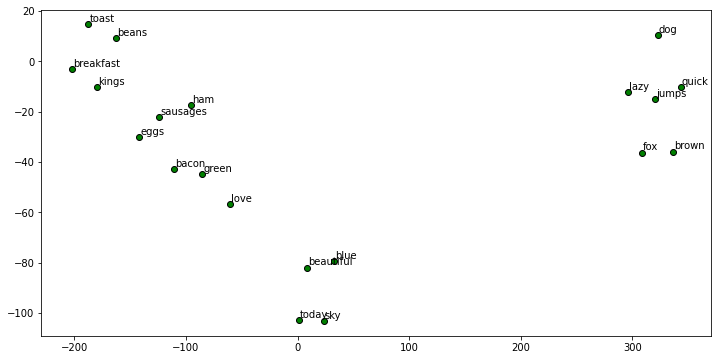

In [41]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

**Getting document level embeddings**

In [42]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [43]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.017834,1.219471,-0.471404,0.100632,-0.485411,-0.580870,-0.183611,-0.032766,-0.266565,0.289460,0.074620,0.748789,-0.517958,0.038283,-0.297274
1,-1.051389,0.996752,-0.461333,0.187398,-0.399002,-0.535357,-0.133190,-0.102741,-0.235152,0.255751,0.070397,0.575714,-0.376731,0.007694,-0.241070
2,-0.080685,1.394714,1.015425,0.091486,-1.111383,-0.360878,-0.166006,0.346778,-0.375867,0.003422,0.676978,-0.001734,-0.380349,0.563245,0.395930
3,-1.443467,0.329564,-0.008377,1.037905,-0.312026,-0.233052,0.184552,-0.440906,-0.320137,-0.371566,0.666171,-0.895322,0.647324,-0.199162,-0.239623
4,-1.307474,0.324607,-0.140498,0.826300,-0.173477,-0.265190,0.072099,-0.486643,-0.283610,-0.157870,0.412292,-0.508161,0.427139,-0.166446,-0.225815
5,-0.189542,1.352578,0.803024,0.068530,-1.020865,-0.378753,-0.193295,0.301214,-0.350197,0.057726,0.584805,0.126631,-0.409361,0.484519,0.307555
6,-1.085396,1.229123,-0.536072,0.100034,-0.476581,-0.611018,-0.181043,-0.026112,-0.259882,0.283033,0.046487,0.772775,-0.532793,0.030967,-0.318839
7,-0.088025,1.415853,1.003639,0.080209,-1.119665,-0.375660,-0.176112,0.350506,-0.377900,0.002104,0.662523,0.023472,-0.398187,0.561428,0.385074


**Document Clustering**

In [44]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


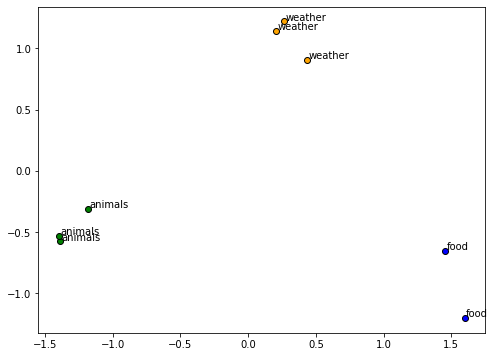

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')